## #MakeoverMonday 2019w39: Evictions in San Francisco

**Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Importing and overviewing data**

In [2]:
df = pd.read_csv('SF_Eviction_Notices.csv', low_memory=False)

In [3]:
df.shape

(41043, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41043 entries, 0 to 41042
Data columns (total 29 columns):
Eviction ID                            41043 non-null object
Address                                41043 non-null object
City                                   41041 non-null object
State                                  41041 non-null object
Eviction Notice Source Zipcode         40369 non-null object
File Date                              41043 non-null object
Non Payment                            41043 non-null bool
Breach                                 41043 non-null bool
Nuisance                               41043 non-null bool
Illegal Use                            41043 non-null bool
Failure to Sign Renewal                41043 non-null bool
Access Denial                          41043 non-null bool
Unapproved Subtenant                   41043 non-null bool
Owner Move In                          41043 non-null bool
Demolition                             41043 non-null

In [5]:
df.head()

,Eviction ID,Address,City,State,Eviction Notice Source Zipcode,File Date,Non Payment,Breach,Nuisance,Illegal Use,...,Roommate Same Unit,Other Cause,Late Payments,Lead Remediation,Development,Good Samaritan Ends,Constraints Date,Supervisor District,Neighborhoods - Analysis Boundaries,Location
0,M191809,700 Block Of Gonzalez Drive,San Francisco,CA,94132,07/29/2019,False,True,False,False,...,False,False,False,False,False,False,NaN,7.0,Lakeshore,POINT (-122.48059457480959 37.71751346803292)
1,M191803,700 Block Of Gonzalez Drive,San Francisco,CA,94132,07/29/2019,False,True,False,False,...,False,False,False,False,False,False,NaN,7.0,Lakeshore,POINT (-122.48066097526849 37.71741710510966)
2,M191805,800 Block Of Gonzalez Drive,San Francisco,CA,94132,07/29/2019,False,True,False,False,...,False,False,False,False,False,False,NaN,7.0,Lakeshore,POINT (-122.48059457480959 37.71751346803292)
3,M191790,300 Block Of Gonzalez Drive,San Francisco,CA,94132,07/29/2019,False,True,False,False,...,False,False,False,False,False,False,NaN,7.0,Lakeshore,POINT (-122.47657722541055 37.71621109111555)
4,M191824,600 Block Of Geary Street,San Francisco,CA,94102,07/29/2019,False,False,True,False,...,False,False,False,False,False,False,NaN,3.0,Tenderloin,POINT (-122.41399503430975 37.78667901466992)


**Cleaning the dates column**

In [6]:
df['File Date'] = pd.to_datetime(df['File Date'])

In [7]:
df['File Date'].describe() # checking if data is available for full years

count                   41043
unique                   5582
top       2012-08-16 00:00:00
freq                      240
first     1997-01-02 00:00:00
last      2019-07-29 00:00:00
Name: File Date, dtype: object

In [8]:
df = df[ (df['File Date'] > '1997-12-31') & (df['File Date'] < '2019-01-01') ]  # keeping 30 years of data

**Excluding unnecessary columns**

In [9]:
df.columns

Index(['Eviction ID', 'Address', 'City', 'State',
       'Eviction Notice Source Zipcode', 'File Date', 'Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 'Other Cause',
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Constraints Date', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Location'],
      dtype='object')

In [10]:
dfs = df[['Non Payment', 'Breach', 'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial', 
                              'Unapproved Subtenant', 'Owner Move In', 'Demolition', 'Capital Improvement', 'Substantial Rehab',
                              'Ellis Act WithDrawal', 'Condo Conversion', 'Roommate Same Unit', 'Late Payments', 'Lead Remediation', 
                              'Development', 'Good Samaritan Ends', 'Other Cause', 'Neighborhoods - Analysis Boundaries']] # keeping only the neighbourhoods and the reasons

**Melting the DataFrame to calculate # evictions**

In [11]:
dfm = pd.melt(dfs, id_vars=['Neighborhoods - Analysis Boundaries'], value_vars=['Non Payment', 'Breach',
       'Nuisance', 'Illegal Use', 'Failure to Sign Renewal', 'Access Denial',
       'Unapproved Subtenant', 'Owner Move In', 'Demolition',
       'Capital Improvement', 'Substantial Rehab', 'Ellis Act WithDrawal',
       'Condo Conversion', 'Roommate Same Unit', 
       'Late Payments', 'Lead Remediation', 'Development',
       'Good Samaritan Ends', 'Other Cause'], var_name='cause', value_name='evictions')

In [12]:
dfm.head()

,Neighborhoods - Analysis Boundaries,cause,evictions
0,Nob Hill,Non Payment,False
1,Sunset/Parkside,Non Payment,False
2,Haight Ashbury,Non Payment,False
3,Outer Mission,Non Payment,False
4,North Beach,Non Payment,False


In [13]:
dfm.columns = ['neighbourhood', 'cause', 'evictions']

In [14]:
dfg = dfm.groupby(['neighbourhood', 'cause'], as_index=False).evictions.sum()

In [15]:
dfg.head()

,neighbourhood,cause,evictions
0,Bayview Hunters Point,Access Denial,38.0
1,Bayview Hunters Point,Breach,239.0
2,Bayview Hunters Point,Capital Improvement,13.0
3,Bayview Hunters Point,Condo Conversion,0.0
4,Bayview Hunters Point,Demolition,34.0


**Keeping only top neighbourhoods**

In [16]:
dft = dfg.groupby('neighbourhood', as_index=False).evictions.sum().sort_values(by='evictions', ascending=False).reset_index(drop=True)
print(f'Top 20 neighbourhoods represent {(round(sum(dft.head(20).evictions) / sum(dft.evictions), 2))*100}% of total evictions.')

Top 20 neighbourhoods represent 81.0% of total evictions.


Let's only keep the top 20.

In [17]:
top_20 = list(dft.neighbourhood.head(20))

In [18]:
df_top = dfg[dfg['neighbourhood'].isin(top_20)]

In [19]:
df_top.sample(5)

,neighbourhood,cause,evictions
313,Marina,Illegal Use,30.0
317,Marina,Nuisance,188.0
413,Noe Valley,Other Cause,23.0
25,Bernal Heights,Ellis Act WithDrawal,109.0
203,Inner Richmond,Nuisance,113.0


**Pivoting melted data for heatmap**

In [20]:
df_heatmap = pd.pivot_table(df_top, values='evictions', index=['neighbourhood'], columns='cause')

In [21]:
df_heatmap.head()

cause,Access Denial,Breach,Capital Improvement,Condo Conversion,Demolition,Development,Ellis Act WithDrawal,Failure to Sign Renewal,Good Samaritan Ends,Illegal Use,Late Payments,Lead Remediation,Non Payment,Nuisance,Other Cause,Owner Move In,Roommate Same Unit,Substantial Rehab,Unapproved Subtenant
neighbourhood,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,38.0,239.0,13.0,0.0,34.0,0.0,26.0,12.0,0.0,29.0,61.0,0.0,140.0,164.0,96.0,235.0,40.0,0.0,12.0
Bernal Heights,10.0,150.0,34.0,6.0,51.0,1.0,109.0,1.0,3.0,24.0,50.0,0.0,62.0,113.0,37.0,376.0,63.0,6.0,11.0
Castro/Upper Market,9.0,316.0,56.0,19.0,42.0,0.0,310.0,3.0,0.0,39.0,79.0,1.0,76.0,199.0,36.0,385.0,90.0,6.0,32.0
Excelsior,18.0,217.0,14.0,0.0,77.0,0.0,53.0,4.0,0.0,28.0,66.0,0.0,92.0,114.0,74.0,365.0,67.0,0.0,7.0
Haight Ashbury,8.0,227.0,75.0,6.0,24.0,0.0,197.0,3.0,0.0,22.0,43.0,0.0,44.0,156.0,25.0,274.0,65.0,1.0,23.0


**Creating, exporting heatmap**

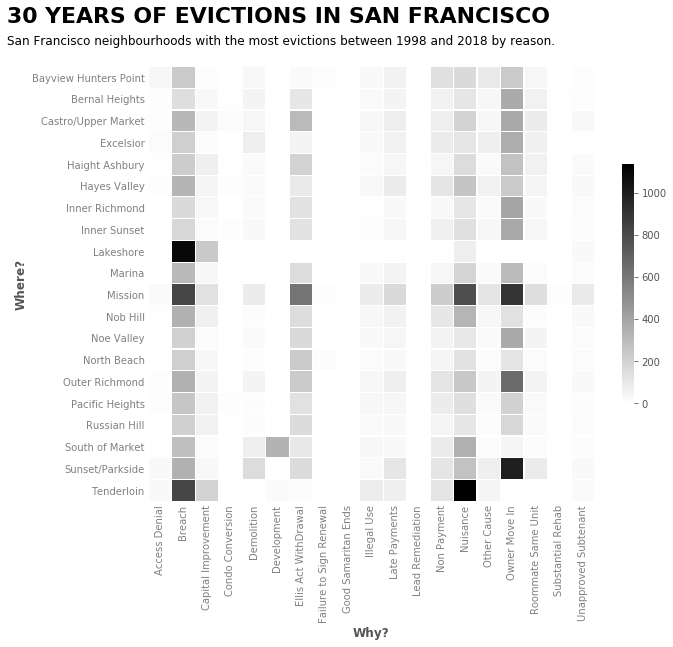

In [27]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 8))

hm = sns.heatmap(df_heatmap, cmap="gist_gray_r", linewidths=.2, linecolor='white', cbar_kws={'shrink':0.55}) 

hm.tick_params(direction='out', length=0, width=2, colors='gray', grid_color='darkgray')

plt.text(-6, -2, "30 YEARS OF EVICTIONS IN SAN FRANCISCO", fontdict={'weight' : 'semibold', 'size' : 22} )
plt.text(-6, -1, "San Francisco neighbourhoods with the most evictions between 1998 and 2018 by reason.", fontdict={'size' : 12} )

plt.xlabel('Why?', fontdict={'weight' : 'semibold', 'size' : 12})
plt.ylabel('Where?', fontdict={'weight' : 'semibold', 'size' : 12})

plt.savefig('MM2019w39.png', orientation='landscape', bbox_inches='tight')
plt.show()